# Lab 05 - FeedForward NN
**Daniel Leskiewicz**


## Introduction 
 - Within this lab we introduce the MLPClassifier and utilize the "neurons.py" to obtain input and create a neurons for the iris dataset. Within this experiment we plot decision boundaries for each neuron to see which hidden layers is doing the best to fit the dataset appropiately. We also utilize the heatmaps to visualize the decision boundaries and see how the decision boundaries look in a different light. Finally, within the experiment we also combined a feature matrices together and compared the confusion matrices and accuracy and if those changed with 4 features or 8 features. 
 - Overall, Neural Networks are a type of machine learning model that is bascially inspired by the human brain itself. After some research, the networks are organized into layers within the layers are neurons. These neurons implement linear models whose output is passed through a activation function.

### Reflection Questions
Problem 1:
1. What do the parameters to the MLPClassifier class mean?
 - The parameters for the MLPClassifier are hidden_layer_size: Which is the size meaning the number of nuerons of the hidden layers within the perceptron. The next parameter is max_iter: Which is the maximum number of iterations used during the training of the network. The next parameter is solver: Which is the formula used for weight optimization. Within this lab we used solver="lbfgs" which is a quasi-Newton method optimizer.

2. Draw the network.
 ![](nnNetwork.png)

3. What activation functions are used for each node?
 - The activation function that is used within each node is the relu function. 

Problem 2:
1. What are the dimensions of mlp_petals.coefs_[0] and mlp_petals.intercepts_[0]? Where do those dimensions come from?
 - The dimensions of the mlppetals.intercepts[0] would be a 4x1 vector. Meanwhile the mlp_petals_coefs[0]is a 2x4 matrix. These sizes come from the MLP. Then B1 and B2 are included for each neuron in the hidden layer. There is 1 intercept for each neuron so the hidden layer is 4x1 accordingly.

2. What are the dimensions of mlp_petals_models? What do the dimensions correspond to?
 - The mlp_petals_models is a 4x3 matrix. The dimensions corresponded to combining the previously mentioned matrices. With linear algebra you can a result of a 4x3 from a 4x2 and a 4x1 from the MLP.

3. Comment on the abilities of the lines to separate setosa vs the rest, versicolor vs the rest, and virginica vs the rest with petal features.
 - The line(s) that best separate Setosa from the rest are l line and the other lines werent really well at dividing the features. 
 - The best line(s) that separated Veriscolor from the rest are lines 3 and 4.
 - The best line(s) that separated Virginica from the rest are 4


Problem 3:
1. How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used logistic function as an activation layer instead?
 - The relu function modifies the output by setting any output that is less than 0 to 0. But, also any ouput that is above 0 to linear and stays the same. This can and does impact the intepretation because anything that lands on one side of the plane is placed on the plane by relu which helps interpreting the heatmaps because we get readable and interpretable results when consulting the heatmap.RelU and logistic function differ because we will always get a zero value for the value of a negative number while with the logistic values we can still possibly end up with negative values.


2. A neural network consists of different layers and a final classification layer. Which activation function (ReLU or logistic) is more suitable to use for a classification layer? Which activation function is more suitable to use for an inner layer? – You may need to look up this information.
 - Well for classificaiton we would want to stick with the logistic regression because personally I feel like it is more suitable for a classification layer. That's because we want values between 0 and 1 when we are classifying which logistic regression can provide. Meanwhile RelU can give us values from 0 to infinity which don't really fit the premise of the classification being between 0 and 1(binary classfication). While for the inner layer ReLU can be used and can be more suitable as a hidden layer because RelU can produce regions where the network won't update and the output is always 0.



Problem 4:
1. How do the confusion matrices and accuracies of the two models compare? Did the transformed features produce a more accurate model?
 - The accuracy of the 4 features is 96% accuracy and the transformed_combined matrix with 8 features has a accuracy of 98% which 

## Imports

In [1]:
import numpy as np
from sklearn import datasets
from neurons import *
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 1. Train Multilayer Perceptron (MPL) Models on Petal and Sepal Features

### a. Load the Iris data set

In [2]:
iris = datasets.load_iris()

### b. Train a MLP on the petal heights and widths

In [3]:
scaled_X = StandardScaler().fit_transform(iris.data)

In [4]:
mlp_petals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver="lbfgs")
mlp_petals.fit(scaled_X[:,2:], iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### c. Create a second MLP model for the sepal features by repeating for features 0 and 1 (the sepals height and widths).

In [5]:
mlp_sepals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver="lbfgs")
mlp_sepals.fit(scaled_X[:,0:2], iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## 2. Visualize Planes Learned by Individual Neurons

### a. Extract the weight vectors for the hidden layers

In [6]:
mlp_petals_models = np.vstack([mlp_petals.intercepts_[0], mlp_petals.coefs_[0]]).T
mlp_sepals_models = np.vstack([mlp_sepals.intercepts_[0], mlp_sepals.coefs_[0]]).T

### b) Re-arrange the following equation to solve for x_2
 - Original Equation : 0 = B0 + B1X1 + B2X2
 - Solving for x2 : -B0 - B1X1 / B2 = X2

In [7]:
def getting_x2_value(B0, B1, B2, X1):
    return (-B0-B1*X1) / B2

### c. Plot features 0 and 1 from scaled_X along with the planes for the 4 neurons in the hidden layer.

Text(0.5, 1.0, 'Scaled Petal Width vs. Length')

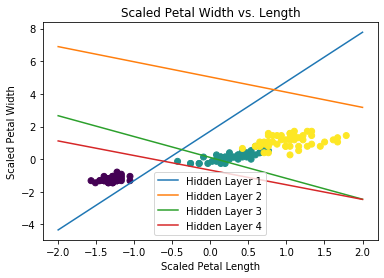

In [8]:
xs = np.linspace(-2,2,100)
plt.scatter(scaled_X[:,2], scaled_X[:,3], c=iris.target)
plt.plot(xs, getting_x2_value(mlp_petals_models[0,0], mlp_petals_models[0,1], mlp_petals_models[0,2], xs), label='Hidden Layer 1')
plt.plot(xs, getting_x2_value(mlp_petals_models[1,0], mlp_petals_models[1,1], mlp_petals_models[1,2], xs), label='Hidden Layer 2')
plt.plot(xs, getting_x2_value(mlp_petals_models[2,0], mlp_petals_models[2,1], mlp_petals_models[2,2], xs), label='Hidden Layer 3')
plt.plot(xs, getting_x2_value(mlp_petals_models[3,0], mlp_petals_models[3,1], mlp_petals_models[3,2], xs), label='Hidden Layer 4')
plt.legend()
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.title("Scaled Petal Width vs. Length")

Text(0.5, 1.0, 'Scaled Sepal Width vs. Length')

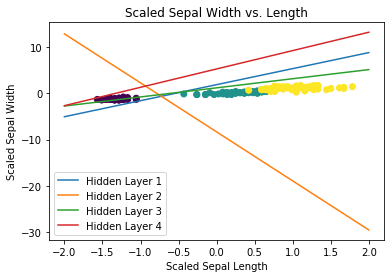

In [9]:
plt.scatter(scaled_X[:,2], scaled_X[:,3], c=iris.target)
plt.plot(xs, getting_x2_value(mlp_sepals_models[0,0], mlp_sepals_models[0,1], mlp_sepals_models[0,2], xs), label='Hidden Layer 1')
plt.plot(xs, getting_x2_value(mlp_sepals_models[1,0], mlp_sepals_models[1,1], mlp_sepals_models[1,2], xs), label='Hidden Layer 2')
plt.plot(xs, getting_x2_value(mlp_sepals_models[2,0], mlp_sepals_models[2,1], mlp_sepals_models[2,2], xs), label='Hidden Layer 3')
plt.plot(xs, getting_x2_value(mlp_sepals_models[3,0], mlp_sepals_models[3,1], mlp_sepals_models[3,2], xs), label='Hidden Layer 4')
plt.legend()
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.title("Scaled Sepal Width vs. Length")

## 3. Visualize Decision Boundaries Resulting from Planes and ReLU Activation Function

### b. Plot the grid as a scatter plot

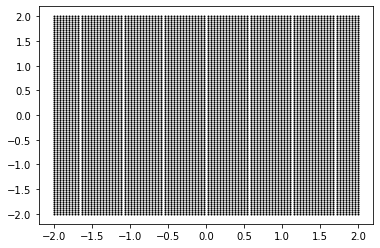

In [10]:
#used linspace from previous part
xx, yy = np.meshgrid(xs,xs)
plt.scatter(xx, yy, s=1, c='k')

### c. Using the Input and Neuron classes in the provided neurons.py file to calculate the value for the first hidden layer

In [11]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_petals_models[0,:])
predicted = layer_nn.predict(mesh_reshape)

### d. Plot the model outputs as a heatmap or contourf plot

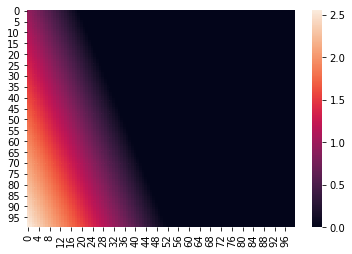

In [12]:
p = predicted.reshape(100,100)
htmp = sns.heatmap(p)

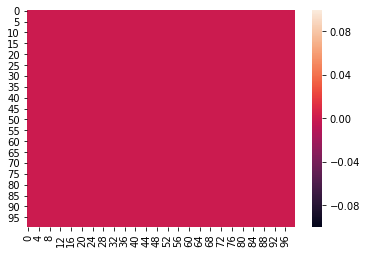

In [13]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_petals_models[1,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

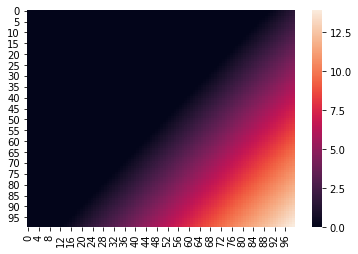

In [14]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_petals_models[2,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

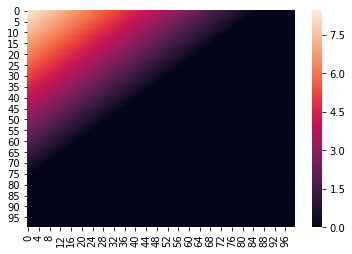

In [15]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_petals_models[3,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

### f. Repeating this process for the hidden layer of the sepals models

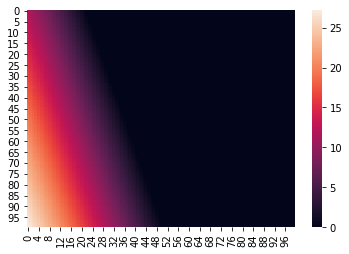

In [16]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_sepals_models[0,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

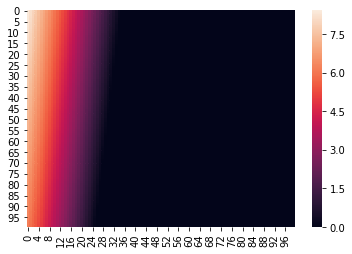

In [17]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_sepals_models[1,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

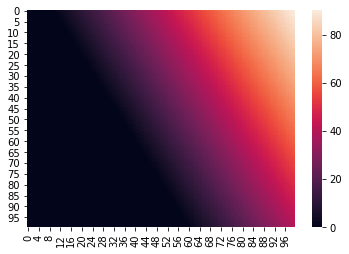

In [18]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_sepals_models[2,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

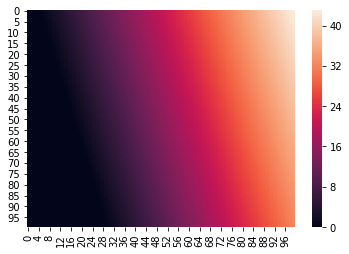

In [19]:
mesh_reshape = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
input = Input()
layer_nn = Neuron([input], mlp_sepals_models[3,:])
predicted = layer_nn.predict(mesh_reshape).reshape(100,100)
htmp = sns.heatmap(predicted)

## 4. Train Logistic Regression models on Transformed and Original Features

### a. Use the input, Neuron, and HStack classes with the weights from the MLP model to recreate the hidden layer

In [20]:
input = Input()
p_layer_1 = Neuron([input], mlp_petals_models[0,:])
p_layer_2 = Neuron([input], mlp_petals_models[1,:])
p_layer_3= Neuron([input], mlp_petals_models[2,:])
p_layer_4 = Neuron([input], mlp_petals_models[3,:])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

### b. Predict the transformed values to create a transformed feature matrix

In [21]:
transformed_petals_X = stacked.predict(scaled_X[:,2:])

### c. Repeat for the sepal widths heights MLP model

In [22]:
input = Input()
p_layer_1 = Neuron([input], mlp_sepals_models[0,:])
p_layer_2 = Neuron([input], mlp_sepals_models[1,:])
p_layer_3= Neuron([input], mlp_sepals_models[2,:])
p_layer_4 = Neuron([input], mlp_sepals_models[3,:])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

In [23]:
transformed_sepals_X = stacked.predict(scaled_X[:,:2])

### d. Combine the two transformed feature matrix into a new feature matrix with 8 columns.

In [24]:
transformed_combined = np.hstack([transformed_petals_X, transformed_sepals_X])

### e. Train two LR models using SGDClassifier one on the original 4 features and one on the new transformed feature matrix with 8 columns

In [25]:
clf1 = SGDClassifier(loss='log')
clf1.fit(scaled_X, iris.target)
clf2 = SGDClassifier(loss='log')
clf2.fit(transformed_combined, iris.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### f. Evaluate the two models using accuracy and confusion matrices

In [26]:
original_confusion_matrix = confusion_matrix(iris.target, clf1.predict(scaled_X))
eight_column_matrix = confusion_matrix(iris.target, clf2.predict(transformed_combined))
original_pred = clf1.predict(scaled_X)
eight_pred = clf2.predict(transformed_combined)

In [27]:
print("Original Confusion Matrix\n", original_confusion_matrix)

Original Confusion Matrix
 [[49  1  0]
 [ 0 43  7]
 [ 0  1 49]]


In [28]:
print("Accuracy of the original Matrix", accuracy_score(iris.target,original_pred))

Accuracy of the original Matrix 0.94


In [29]:
print("Eight Column Confusion Matrix\n", eight_column_matrix)

Eight Column Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]


In [30]:
print("Accuracy of the eight column Matrix", accuracy_score(iris.target,eight_pred))

Accuracy of the eight column Matrix 0.9533333333333334
